In [1]:
%load_ext autoreload
%autoreload 2
import jax.numpy as jnp
from jax import grad
import jax
import numpy as np
import math
import keras
%matplotlib inline
from jaxmodel import *
import keras 
from model2 import *

[[4. 3.]
 [2. 0.]
 [1. 2.]]
 Avg loss: 29.0
Elapsed time for one epoch: 0.0005357000045478344 seconds


# Test model

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz", )
indices = np.arange(len(x_train))
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]

def batch(x, y, batch_size=32):
    if len(x) % batch_size != 0:
        x = x[:batch_size * (len(x)//batch_size)]
        y=y[:batch_size*(len(x)//batch_size)]
    return np.array_split(x, len(x) / batch_size, axis=0), np.array_split(y, len(y)/batch_size, axis=0)

def fix_data(x, y):
    x = x.reshape(x.shape[0], 28*28)/255
    test = np.zeros((x.shape[0], 10))
    test[np.arange(x.shape[0]),y] = 1
    return (x, test)

fixed_x, fixed_y = fix_data(x_train, y_train)
b_x , b_y = batch(fixed_x, fixed_y, 32)
x_test, y_test = batch(*fix_data(x_test, y_test))



# Testing the model

In [3]:
model = Model2(28*28, 10, [8, 16],) 

datas = []
for _epoch in range(1):
    print(f"starting epoch {_epoch}")
    model.train_epoch(fixed_x, fixed_y)

starting epoch 0
 Avg loss: 0.47597023153187834
Elapsed time for one epoch: 516.3211594000459 seconds


In [8]:
jaxmodel = JaxModel(28*28, 10, [ 8, 16], jax_mse, jax_softmax) 
''''
Model signature: JaxModel(in_features, out_features, layer_sizes, loss_fn, activation_fn)

#Feel free to try jax_cross_entropy instead of jax_mse 
# or jax_softmax instead of jax_sigmoid
# You can change layer_sizes to any list of integers that you want! Layer sizes dictates how big the hiddne layers are
#Do note that some of these combos, while you can use them together arent exactly optimal, in terms of time to train or accuracy. (as I learnt by experience.)
'''
datas = []
for _epoch in range(1):
    print(f"starting epoch {_epoch}")
    jaxmodel.train_epoch(b_x, b_y,  (x_test, y_test), lr=1e-2 )

starting epoch 0
Loss: 0.8953


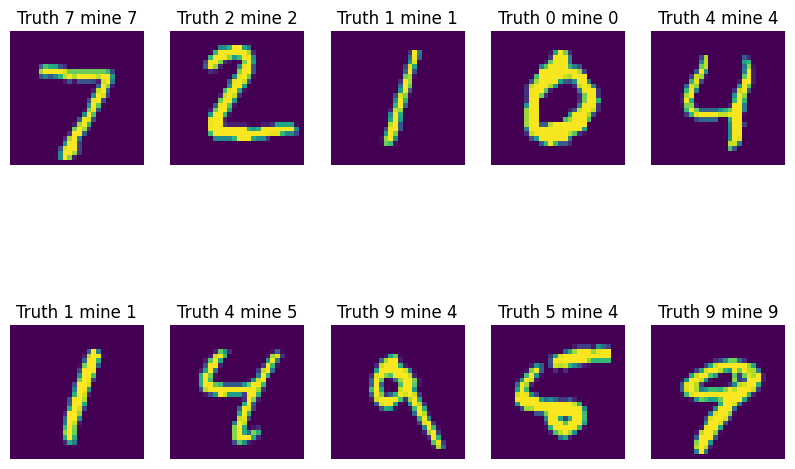

: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

fig = plt.figure(figsize=(10, 7))
pic = 1
for i, img in enumerate(x_test[0][:10]):
  plt.subplot(2, 5, pic)
  plt.axis('off')
  predicted = model.fd(jnp.array(img.flat))
  plt.title(f"Truth {np.argmax(y_test[0][i])} mine {np.argmax(predicted)}")
  plt.imshow(img.reshape(28, 28))
  pic+= 1
plt.show()

#As you can see the model has learnt to recognize numbers! 

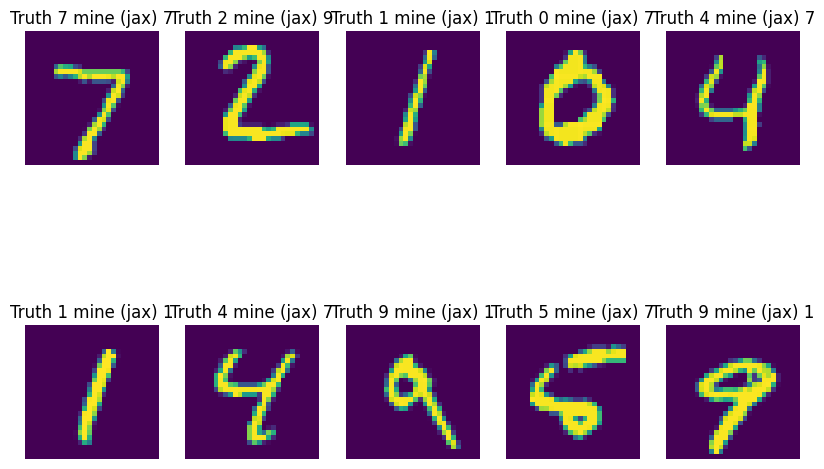

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

fig = plt.figure(figsize=(10, 7))
pic = 1
for i, img in enumerate(x_test[0][:10]):
  plt.subplot(2, 5, pic)
  plt.axis('off')
  predicted = jaxmodel.fd(jnp.array(img.flat))
  plt.title(f"Truth {np.argmax(y_test[0][i])} mine (jax) {jnp.argmax(predicted)}")
  plt.imshow(img.reshape(28, 28))
  pic+= 1
plt.show()

#As you can see the model has learnt to recognize numbers! 